# Tensorflow2 10분만에 훑어보기

Tensorflow2 학습은 Tensorflow2 공식 홈페이지의 내용이 좋기때문에 해당 내용 기반으로 수행해 가면서 익혀봅니다.

https://www.tensorflow.org/overview?hl=ko

**초보자를 위한 빠른 시작**에서는 Keras의 Sequential Model을 기반으로 간단하게 모델을 설계하는 것을 보여 줍니다.
* [Sequential Model](https://keras.io/getting-started/sequential-model-guide/)
  * 스택처럼 쌓아서 만드는 단일 구조의 딥러닝 모델을 간편하게 설계할 수 있습니다.

**전문가를 위한 빠른 시작**에서는 Keras의 Function API 및 tf.function 을 이용하는 방식을 보여줍니다.
* [Function API](https://keras.io/getting-started/functional-api-guide/)
  * 다양한 모델을 엮어 만드는 복잡한 구조의 딥러닝 모델을 설계할 수 있습니다.
  * multi-output models, directed acyclic graphs, 또는 shared layers를 가지는 모델들의 설계가 가능합니다.
  
Tensorflow2 로 넘어 오면서 
* API 정리: 기존에 복잡했던 API 들에 대한 정리가 이루어지고, Keras 가 High Level Core API 로 포함되었습니다.
* Eager execution: Pytorch 처럼 즉시 실행이 기본 동작이 되었습니다. 
* @tf.function: 데코레이터를 이용하면 편리하게 데이터의 비동기 프리페치(Prefetch)/스트리밍(Streaming) 기능 및 오토그래프(Autograph)를 적용 시켜 성능 향상됩니다.

Tensorflow2 에 대한 상세 소개는 아래 동영상을 참고하세요

[![youtube](https://img.youtube.com/vi/FvAsdZwavpA/0.jpg)](https://www.youtube.com/watch?v=FvAsdZwavpA)


In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

# 노트북 셀 표시를 브라우저 전체 폭 사용하기
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline
import matplotlib.pyplot as plt

import sys

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import tensorflow as tf
tf.random.set_seed(rseed)
tf.keras.backend.set_floatx('float32') # keras default float type 설정

print(f"python ver={sys.version}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"tensorflow ver={tf.__version__}")

python ver=3.7.6 (default, Nov 21 2020, 22:51:13) 
[Clang 12.0.0 (clang-1200.0.32.27)]
pandas ver=1.0.5
numpy ver=1.19.5
tensorflow ver=2.1.0


## 초보자를 위한 빠른 시작

https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

n=60000, w=28, h=28
type: x_train=uint8
type: y_train=uint8
sample: x_train=


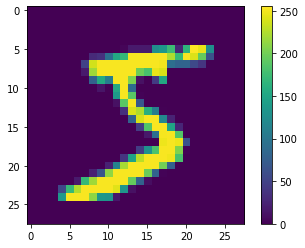

sample: y_train=5
type: x_train=float64


In [2]:
# MNIST 샘플 데이터
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

n, w, h = x_train.shape
print(f"n={n}, w={w}, h={h}")
print(f"type: x_train={x_train.dtype}")
print(f"type: y_train={y_train.dtype}")

print(f"sample: x_train=")
# 학습할 이미지는 28x28 사이즈의 0~255 사이 값을 가지는 패션 이미지 입니다.
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(f"sample: y_train={y_train[0]}")

# Data를 0 ~ 1 사이 float 값으로 Scaling 을 변환 합니다.
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"type: x_train={x_train.dtype}")

In [3]:
# Sequential 방식으로 모델 설계
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 28x28 형태로 데이터를 입력 받아 1차원 형태로 변환
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 출력 / 컴파일
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy 손실 함수를 사용하면 학습/평가시 y 값을 one hot 인코딩 해주지 않아도 되어 편리
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2985 - accuracy: 0.9121
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1446 - accuracy: 0.9569
Epoch 3/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1068 - accuracy: 0.9679
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0894 - accuracy: 0.9718
Epoch 5/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0764 - accuracy: 0.9765
10000/10000 - 0s - loss: 0.0763 - accuracy: 0.9756


[0.07631827671749052, 0.9756]

## 전문가를 위한 빠른 시작

https://www.tensorflow.org/tutorials/quickstart/advanced?hl=ko

동일 데이터셋 및 모델을 기준으로 설명하기 위해 데이터 전처리 및 모델 생성 코드를 약간 수정하였습니다.

In [5]:
# Dataset 을 통해 미니 배치 학습을 위한 데이터 셋을 쉽게 만들 수 있습니다. 
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32) # 버퍼사이즈(10000)만큼씩 데이터를 랜덤하게 가져와서 배치사이즈(32)만큼씩 제공합니다.  
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [6]:
class DNN(tf.keras.Model):
    # 모델에 필요한 각 레이어를 선언합니다.
    def __init__(self):
        super(DNN, self).__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28), dtype='float64') # 28x28 형태로 데이터를 입력 받아 1차원 형태로 변환
        self.dense = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.softmax = tf.keras.layers.Dense(10, activation='softmax')

    # 각 레이어를 연결합니다.
    def call(self, x):
        x = self.flatten(x)
        x = self.dense(x)
        x = self.dropout(x)
        return self.softmax(x)

model = DNN()

In [7]:
# Loss 함수와 Optimizer를 선언합니다.
loss_object = tf.keras.losses.SparseCategoricalCrossentropy() # SparseCategoricalCrossentropy()를 사용하면 학습/평가시 y 값을 one hot 인코딩 해주지 않아도 되어 편리
optimizer = tf.keras.optimizers.Adam()

In [8]:
# 학습 결과를 저장할 변수를 선언합니다.
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [9]:
# GradientTape()을 통해 Loss 를 학습시킵니다. 
@tf.function # tf.function 을 통해 성능을 향상합니다.
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [10]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [11]:
EPOCHS = 5

for epoch in range(EPOCHS):
    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'
    print (template.format(epoch+1,
                           train_loss.result(), train_accuracy.result()*100,
                           test_loss.result(), test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

에포크: 1, 손실: 0.25

In [ ]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.